In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import *
import matplotlib as mpl
from matplotlib import *
from scipy import *
import StringIO 
from matplotlib import rc
import os 

In [2]:
rc('font',size=35)
rc('xtick',top=True)
rc('xtick',direction= 'in')
rc('xtick',color="white")

rc('ytick',right= True)
rc('ytick',direction= 'in')
rc('ytick',color="white")
norm = mpl.colors.Normalize(vmin=0, vmax=0.15)

In [3]:
d123=[ 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9]
l123=[-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0, 3.0]
e123=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Data file name has the format of : "dl_orbit. a, b, c, d, e.txt"

### orbit= l2, lr2, h2, hr2 for prograde+low e_0, retrograde+low e_0, prograde+high e_0, retrograde+high e_0
### a= 0, 1, 2 for v_g= 0.2, 0.5, 0.8 v_c
### b= 0, 1, 2 for f_dg= 0.3, 0.5, 0.9
### c= 0, 1, 2 for M_bin= 3E+6, 1.0E+7, 1.0E+8 M_sun
### d= 0, 1, 2 for n_gd0= 100, 200, 300 /cm^3
### e= 0, 1, 2 for q= 1/4, 1/8, 1/10 

In [4]:
print (r"1. Choose the v_g you want to generate the 2D plot with. 0 for v_g=0.2 v_c, 1 for v_g=0.5 v_c, 2 for v_g=0.8 v_c")
vg_text = input (r"Enter an integer among 0,1,2: ")
vg_int = int(vg_text)
    

1. Choose the v_g you want to generate the 2D plot with. 0 for v_g=0.2 v_c, 1 for v_g=0.5 v_c, 2 for v_g=0.8 v_c
Enter an integer among 0,1,2: 0


In [5]:
print (r"2. Choose the $M_{\rm bin}$ you want to generate the 2D plot with. 0 for 3E+6, 1 for 1E+7, 2 for 1E+8")
Mbin_text = input (r"Enter an integer among 0,1,2: ")
Mbin_int = int(Mbin_text)

2. Choose the $M_{\rm bin}$ you want to generate the 2D plot with. 0 for 3E+6, 1 for 1E+7, 2 for 1E+8
Enter an integer among 0,1,2: 0


In [6]:
print (r"3. Choose the $q$ you want to generate the 2D plot with. 0 for 1/4, 1 for 1/8, 2 for 1/10")
q_text = input (r"Enter an integer among 0,1,2: ")
q_int = int(q_text)

3. Choose the $q$ you want to generate the 2D plot with. 0 for 1/4, 1 for 1/8, 2 for 1/10
Enter an integer among 0,1,2: 2


## Read in data files of all prograde+low e_0 moels with v_g=0.5*v_c, M_bin=1E+7 M_sun, and q=1/10:


In [7]:

prob_dl=[]
prob_de=[]
prob_le=[]
x_tot=np.array(np.zeros(100))
y_tot=np.array(np.zeros(100))
temp_tot=np.array(np.zeros(100))

for i in range(3):
    for j in range(3):
        filen="dl_l2.{0}.{1}.{2}.{3}.{4}.txt".format(vg_int, i,Mbin_int, j, q_int)
        if os.path.exists(filen):
            f = open(filen,"r")
            data = f.readlines()
            for line in data:
                if line.startswith('#'):
                    continue
                fields=line.split()
                prob_dl.append(float(fields[2]))
            f.close()
            x,y,temp = np.loadtxt(filen).T
            x=np.array(x)
            y=np.array(y)
            temp=np.array(temp)
            x_tot=x_tot+x
            y_tot=y_tot+y
            temp_tot=temp_tot+temp
        else: 
            pass
total_dl=sum(prob_dl)
nrows, ncols = 10, 10
grid1 = (temp_tot/total_dl).reshape((nrows, ncols))
gridt1=grid1.transpose()


## Read in data files of all prograde+high e_0 moels with v_g=0.5*v_c, M_bin=1E+7 M_sun, and q=1/10:


In [8]:

prob_dl=[]
prob_de=[]
prob_le=[]
x_tot=np.array(np.zeros(100))
y_tot=np.array(np.zeros(100))
temp_tot=np.array(np.zeros(100))

for i in range(3):
    for j in range(3):
        filen="dl_h2.{0}.{1}.{2}.{3}.{4}.txt".format(vg_int, i,Mbin_int, j, q_int)
        if os.path.exists(filen):
            f = open(filen,"r")
            data = f.readlines()
            for line in data:
                if line.startswith('#'):
                    continue
                fields=line.split()
                prob_dl.append(float(fields[2]))
            f.close()
            x,y,temp = np.loadtxt(filen).T
            x=np.array(x)
            y=np.array(y)
            temp=np.array(temp)
            x_tot=x_tot+x
            y_tot=y_tot+y
            temp_tot=temp_tot+temp
        else: 
            pass
total_dl=sum(prob_dl)
nrows, ncols = 10, 10
grid2 = (temp_tot/total_dl).reshape((nrows, ncols))
gridt2=grid2.transpose()


## Plot the 2D detectability plot of all prograde models with v_g=0.5*v_c, M_bin=1E+7 M_sun, and q=1/10:


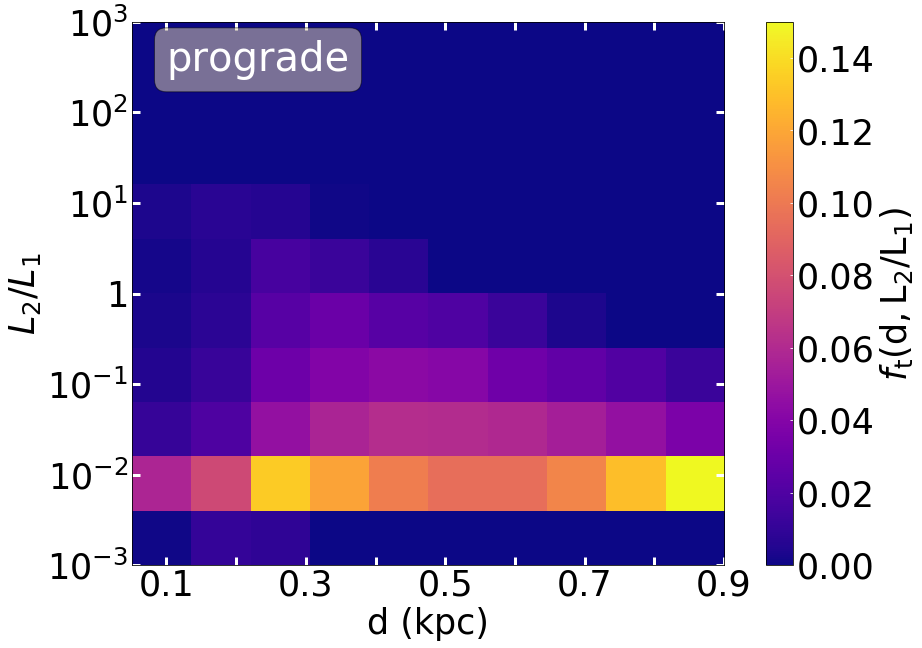

In [9]:
plt.figure(figsize=[15, 10])
sp1=plt.imshow(gridt2+gridt1, origin="lower", extent=((x_tot/9.0).min(), (x_tot/9.0).max(),(y_tot/9.0).min(), (y_tot/9.0).max()), aspect=0.13,
          interpolation='nearest', cmap="plasma",norm=norm)
plt.ylabel(r"$L_2/L_1$")
plt.xlabel(r"d (kpc)")
plt.yticks([-3.0, -2.0,  -1.0,  0.0, 1.0, 2.0, 3.0], [r"$10^{-3}$", r"$10^{-2}$",r"$10^{-1}$", "1",r"$10^{1}$", r"$10^{2}$", r"$10^{3}$"],color="black")
#plt.yticks([-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0, 3.0], [r"$10^{-3}$", r"$10^{-2}$","",r"$10^{-1}$", "", "1", "",r"$10^{1}$", r"$10^{2}$", r"$10^{3}$"],color="black")
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9],["0.1","", "0.3","", "0.5", "", "0.7","","0.9"],color="black")
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=8)
textstr = "prograde"
props = dict(boxstyle='round', facecolor='#e6daa6', alpha=0.5)

plt.text(0.1, 2.8, textstr, fontsize=40, color="white",
        verticalalignment='top', bbox=props)
clb1=plt.colorbar(sp1)
clb1.set_label(r'$f_{\rm t} ({\rm d}, {\rm L_2/L_1})$')
plt.setp(plt.getp(clb1.ax.axes, 'yticklabels'), color="black")
plt.show()


## Read in data files of all retrograde+low e_0 moels with v_g=0.5*v_c, M_bin=1E+7 M_sun, and q=1/10:


In [10]:

prob_dl=[]
prob_de=[]
prob_le=[]
x_tot=np.array(np.zeros(100))
y_tot=np.array(np.zeros(100))
temp_tot=np.array(np.zeros(100))

for i in range(3):
    for j in range(3):
        filen="dl_lr2.{0}.{1}.{2}.{3}.{4}.txt".format(vg_int, i,Mbin_int, j, q_int)
        if os.path.exists(filen):
            f = open(filen,"r")
            data = f.readlines()
            for line in data:
                if line.startswith('#'):
                    continue
                fields=line.split()
                prob_dl.append(float(fields[2]))
            f.close()
            x,y,temp = np.loadtxt(filen).T
            x=np.array(x)
            y=np.array(y)
            temp=np.array(temp)
            x_tot=x_tot+x
            y_tot=y_tot+y
            temp_tot=temp_tot+temp
        else: 
            pass
total_dl=sum(prob_dl)
nrows, ncols = 10, 10
grid3 = (temp_tot/total_dl).reshape((nrows, ncols))
gridt3=grid3.transpose()


## Read in data files of all retrograde+high e_0 moels with v_g=0.5*v_c, M_bin=1E+7 M_sun, and q=1/10:


In [11]:

prob_dl=[]
prob_de=[]
prob_le=[]
x_tot=np.array(np.zeros(100))
y_tot=np.array(np.zeros(100))
temp_tot=np.array(np.zeros(100))

for i in range(3):
    for j in range(3):
        filen="dl_hr2.{0}.{1}.{2}.{3}.{4}.txt".format(vg_int, i,Mbin_int, j, q_int)
        if os.path.exists(filen):
            f = open(filen,"r")
            data = f.readlines()
            for line in data:
                if line.startswith('#'):
                    continue
                fields=line.split()
                prob_dl.append(float(fields[2]))
            f.close()
            x,y,temp = np.loadtxt(filen).T
            x=np.array(x)
            y=np.array(y)
            temp=np.array(temp)
            x_tot=x_tot+x
            y_tot=y_tot+y
            temp_tot=temp_tot+temp
        else: 
            pass
total_dl=sum(prob_dl)
nrows, ncols = 10, 10
grid4 = (temp_tot/total_dl).reshape((nrows, ncols))
gridt4=grid4.transpose()


## Plot the 2D detectability plot of all retrograde models with v_g=0.5*v_c, M_bin=1E+7 M_sun, and q=1/10:

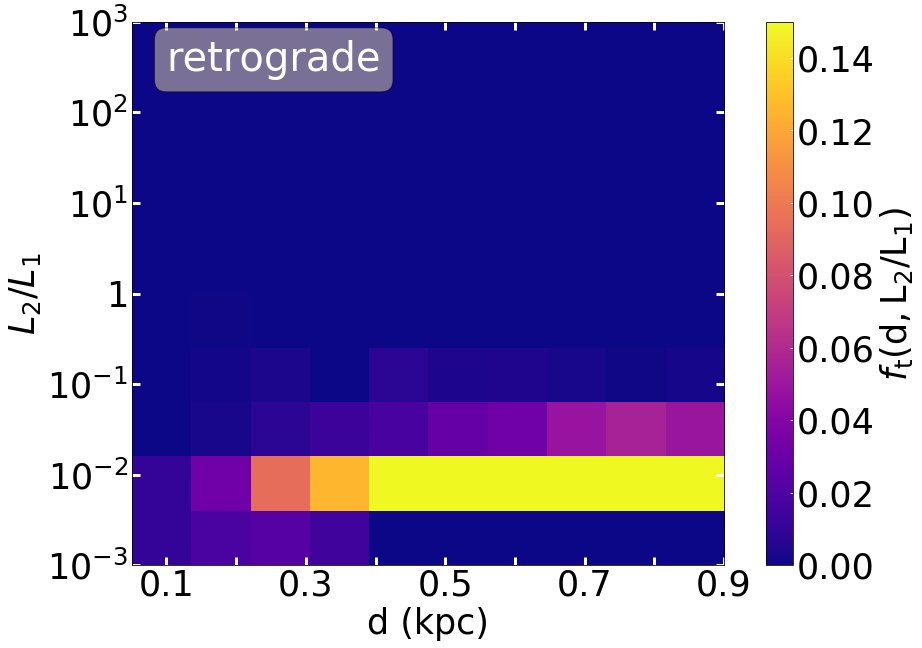

In [12]:
plt.figure(figsize=[15, 10])
sp1=plt.imshow(gridt3+gridt4, origin="lower", extent=((x_tot/9.0).min(), (x_tot/9.0).max(),(y_tot/9.0).min(), (y_tot/9.0).max()), aspect=0.13,
          interpolation='nearest', cmap="plasma",norm=norm)
plt.ylabel(r"$L_2/L_1$")
plt.xlabel(r"d (kpc)")
plt.yticks([-3.0, -2.0,  -1.0,  0.0, 1.0, 2.0, 3.0], [r"$10^{-3}$", r"$10^{-2}$",r"$10^{-1}$", "1",r"$10^{1}$", r"$10^{2}$", r"$10^{3}$"],color="black")
#plt.yticks([-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0, 3.0], [r"$10^{-3}$", r"$10^{-2}$","",r"$10^{-1}$", "", "1", "",r"$10^{1}$", r"$10^{2}$", r"$10^{3}$"],color="black")
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9],["0.1","", "0.3","", "0.5", "", "0.7","","0.9"],color="black")
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=8)
textstr = "retrograde"
props = dict(boxstyle='round', facecolor='#e6daa6', alpha=0.5)

plt.text(0.1, 2.8, textstr, fontsize=40, color="white",
        verticalalignment='top', bbox=props)
clb1=plt.colorbar(sp1)
clb1.set_label(r'$f_{\rm t} ({\rm d}, {\rm L_2/L_1})$')
plt.setp(plt.getp(clb1.ax.axes, 'yticklabels'), color="black")
plt.show()

## Read in data files of all prograde+low e_0 moels with v_g=0.8*v_c, M_bin=1E+8 M_sun, and q=1/4:

In [13]:
print (r"1. Choose the v_g you want to generate the 2D plot with. 0 for v_g=0.2 v_c, 1 for v_g=0.5 v_c, 2 for v_g=0.8 v_c")
vg_text_2 = input (r"Enter an integer among 0,1,2: ")
vg_int_2 = int(vg_text_2)

1. Choose the v_g you want to generate the 2D plot with. 0 for v_g=0.2 v_c, 1 for v_g=0.5 v_c, 2 for v_g=0.8 v_c
Enter an integer among 0,1,2: 2


In [14]:
print (r"2. Choose the $M_{\rm bin}$ you want to generate the 2D plot with. 0 for 3E+6, 1 for 1E+7, 2 for 1E+8")
Mbin_text_2 = input (r"Enter an integer among 0,1,2: ")
Mbin_int_2 = int(Mbin_text_2)

2. Choose the $M_{\rm bin}$ you want to generate the 2D plot with. 0 for 3E+6, 1 for 1E+7, 2 for 1E+8
Enter an integer among 0,1,2: 2


In [15]:
print (r"3. Choose the $q$ you want to generate the 2D plot with. 0 for 1/4, 1 for 1/8, 2 for 1/10:")
q_text_2 = input (r"Enter an integer among 0,1,2: ")
q_int_2 = int(q_text_2)

3. Choose the $q$ you want to generate the 2D plot with. 0 for 1/4, 1 for 1/8, 2 for 1/10:
Enter an integer among 0,1,2: 0


In [16]:

prob_dl=[]
prob_de=[]
prob_le=[]
x_tot=np.array(np.zeros(100))
y_tot=np.array(np.zeros(100))
temp_tot=np.array(np.zeros(100))

for i in range(3):
    for j in range(3):
        filen="dl_l2.{0}.{1}.{2}.{3}.{4}.txt".format(vg_int_2, i,Mbin_int_2, j, q_int_2)
        if os.path.exists(filen):
            f = open(filen,"r")
            data = f.readlines()
            for line in data:
                if line.startswith('#'):
                    continue
                fields=line.split()
                prob_dl.append(float(fields[2]))
            f.close()
            x,y,temp = np.loadtxt(filen).T
            x=np.array(x)
            y=np.array(y)
            temp=np.array(temp)
            x_tot=x_tot+x
            y_tot=y_tot+y
            temp_tot=temp_tot+temp
        else: 
            pass
total_dl=sum(prob_dl)
nrows, ncols = 10, 10
grid1b = (temp_tot/total_dl).reshape((nrows, ncols))
gridt1b=grid1b.transpose()


## Read in data files of all prograde+high e_0 moels with v_g=0.8*v_c, M_bin=1E+8 M_sun, and q=1/4:

In [17]:

prob_dl=[]
prob_de=[]
prob_le=[]
x_tot=np.array(np.zeros(100))
y_tot=np.array(np.zeros(100))
temp_tot=np.array(np.zeros(100))

for i in range(3):
    for j in range(3):
        filen="dl_h2.{0}.{1}.{2}.{3}.{4}.txt".format(vg_int_2, i,Mbin_int_2, j, q_int_2)
        if os.path.exists(filen):
            f = open(filen,"r")
            data = f.readlines()
            for line in data:
                if line.startswith('#'):
                    continue
                fields=line.split()
                prob_dl.append(float(fields[2]))
            f.close()
            x,y,temp = np.loadtxt(filen).T
            x=np.array(x)
            y=np.array(y)
            temp=np.array(temp)
            x_tot=x_tot+x
            y_tot=y_tot+y
            temp_tot=temp_tot+temp
        else: 
            pass
total_dl=sum(prob_dl)
nrows, ncols = 10, 10
grid2b = (temp_tot/total_dl).reshape((nrows, ncols))
gridt2b=grid2b.transpose()


## Plot the 2D detectability plot of all prograde models with v_g=0.8*v_c, M_bin=1E+8 M_sun, and q=1/4:

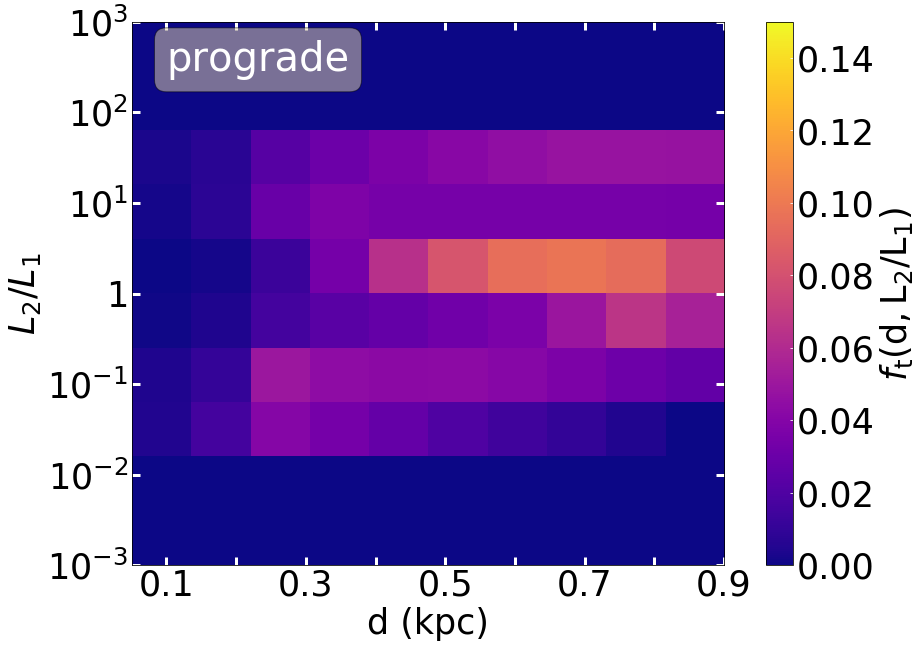

In [18]:
plt.figure(figsize=[15, 10])
sp1=plt.imshow(gridt2b+gridt1b, origin="lower", extent=((x_tot/9.0).min(), (x_tot/9.0).max(),(y_tot/9.0).min(), (y_tot/9.0).max()), aspect=0.13,
          interpolation='nearest', cmap="plasma",norm=norm)
plt.ylabel(r"$L_2/L_1$")
plt.xlabel(r"d (kpc)")
plt.yticks([-3.0, -2.0,  -1.0,  0.0, 1.0, 2.0, 3.0], [r"$10^{-3}$", r"$10^{-2}$",r"$10^{-1}$", "1",r"$10^{1}$", r"$10^{2}$", r"$10^{3}$"],color="black")
#plt.yticks([-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0, 3.0], [r"$10^{-3}$", r"$10^{-2}$","",r"$10^{-1}$", "", "1", "",r"$10^{1}$", r"$10^{2}$", r"$10^{3}$"],color="black")
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9],["0.1","", "0.3","", "0.5", "", "0.7","","0.9"],color="black")
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=8)
textstr = "prograde"
props = dict(boxstyle='round', facecolor='#e6daa6', alpha=0.5)

plt.text(0.1, 2.8, textstr, fontsize=40, color="white",
        verticalalignment='top', bbox=props)
clb1=plt.colorbar(sp1)
clb1.set_label(r'$f_{\rm t} ({\rm d}, {\rm L_2/L_1})$')
plt.setp(plt.getp(clb1.ax.axes, 'yticklabels'), color="black")
plt.show()


## Read in data files of all retrograde+low e_0 moels with v_g=0.8*v_c, M_bin=1E+8 M_sun, and q=1/4:

In [19]:

prob_dl=[]
prob_de=[]
prob_le=[]
x_tot=np.array(np.zeros(100))
y_tot=np.array(np.zeros(100))
temp_tot=np.array(np.zeros(100))

for i in range(3):
    for j in range(3):
        filen="dl_lr2.{0}.{1}.{2}.{3}.{4}.txt".format(vg_int_2, i,Mbin_int_2, j, q_int_2)
        if os.path.exists(filen):
            f = open(filen,"r")
            data = f.readlines()
            for line in data:
                if line.startswith('#'):
                    continue
                fields=line.split()
                prob_dl.append(float(fields[2]))
            f.close()
            x,y,temp = np.loadtxt(filen).T
            x=np.array(x)
            y=np.array(y)
            temp=np.array(temp)
            x_tot=x_tot+x
            y_tot=y_tot+y
            temp_tot=temp_tot+temp
        else: 
            pass
total_dl=sum(prob_dl)
nrows, ncols = 10, 10
grid3b = (temp_tot/total_dl).reshape((nrows, ncols))
gridt3b=grid3b.transpose()


## Read in data files of all retrograde+high e_0 moels with v_g=0.8*v_c, M_bin=1E+8 M_sun, and q=1/4:

In [20]:

prob_dl=[]
prob_de=[]
prob_le=[]
x_tot=np.array(np.zeros(100))
y_tot=np.array(np.zeros(100))
temp_tot=np.array(np.zeros(100))

for i in range(3):
    for j in range(3):
        filen="dl_hr2.{0}.{1}.{2}.{3}.{4}.txt".format(vg_int_2, i,Mbin_int_2, j, q_int_2)
        if os.path.exists(filen):
            f = open(filen,"r")
            data = f.readlines()
            for line in data:
                if line.startswith('#'):
                    continue
                fields=line.split()
                prob_dl.append(float(fields[2]))
            f.close()
            x,y,temp = np.loadtxt(filen).T
            x=np.array(x)
            y=np.array(y)
            temp=np.array(temp)
            x_tot=x_tot+x
            y_tot=y_tot+y
            temp_tot=temp_tot+temp
        else: 
            pass
total_dl=sum(prob_dl)
nrows, ncols = 10, 10
grid4b = (temp_tot/total_dl).reshape((nrows, ncols))
gridt4b=grid4b.transpose()


## Plot the 2D detectability plot of all retrograde models with v_g=0.8*v_c, M_bin=1E+8 M_sun, and q=1/4:

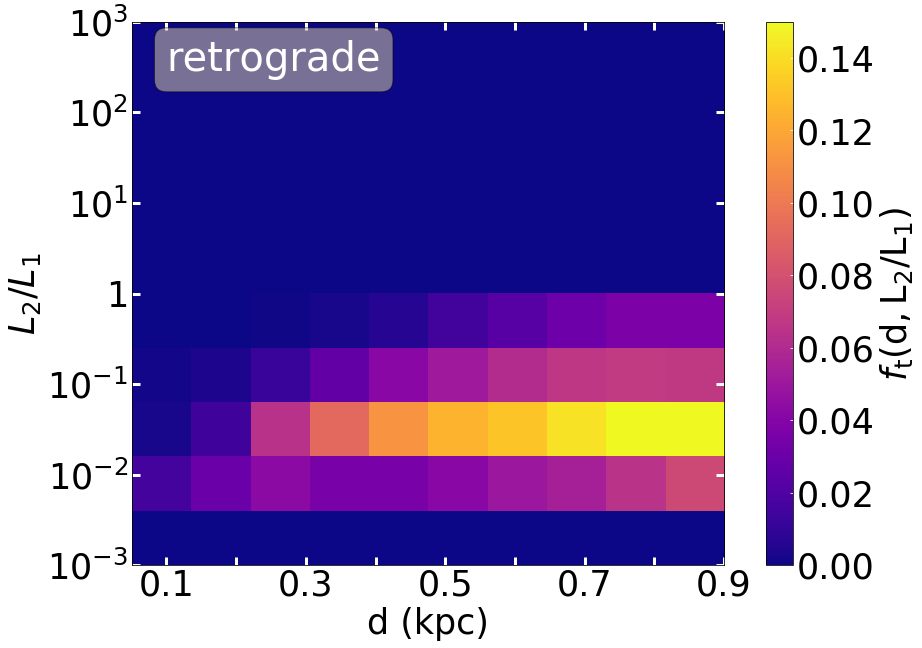

In [21]:
plt.figure(figsize=[15, 10])
sp1=plt.imshow(gridt3b+gridt4b, origin="lower", extent=((x_tot/9.0).min(), (x_tot/9.0).max(),(y_tot/9.0).min(), (y_tot/9.0).max()), aspect=0.13,
          interpolation='nearest', cmap="plasma",norm=norm)
plt.ylabel(r"$L_2/L_1$")
plt.xlabel(r"d (kpc)")
plt.yticks([-3.0, -2.0,  -1.0,  0.0, 1.0, 2.0, 3.0], [r"$10^{-3}$", r"$10^{-2}$",r"$10^{-1}$", "1",r"$10^{1}$", r"$10^{2}$", r"$10^{3}$"],color="black")
#plt.yticks([-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0, 3.0], [r"$10^{-3}$", r"$10^{-2}$","",r"$10^{-1}$", "", "1", "",r"$10^{1}$", r"$10^{2}$", r"$10^{3}$"],color="black")
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9],["0.1","", "0.3","", "0.5", "", "0.7","","0.9"],color="black")
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=8)
textstr = "retrograde"
props = dict(boxstyle='round', facecolor='#e6daa6', alpha=0.5)

plt.text(0.1, 2.8, textstr, fontsize=40, color="white",
        verticalalignment='top', bbox=props)
clb1=plt.colorbar(sp1)
clb1.set_label(r'$f_{\rm t} ({\rm d}, {\rm L_2/L_1})$')
plt.setp(plt.getp(clb1.ax.axes, 'yticklabels'), color="black")
plt.show()